In [2]:
# Importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import scipy.stats as stats
%matplotlib inline
import seaborn as sns

In [3]:
# Take in all of our wrestling data and read it into pandas
avo_imports_all = "HAB_Arrival_Volume_All.csv"
avo_imports_all_df = pd.read_csv(avo_imports_all)

sales_df = pd.read_csv("avocado.csv")

In [4]:
# rename the "Week" in import dataframe to "Date"
avo_imports_all_df = avo_imports_all_df .rename(columns={"Week":"Date","Total Volume in Pounds":"TotalVolume"})

avo_imports_all_df.head()

,Date,California,Mexico,Chile,Dominican Republic,New Zealand,Peru,TotalVolume
0,Jan-05-2014,6300.0,21022833.0,3199846.0,0.0,0.0,0.0,24228979
1,Jan-12-2014,24300.0,40784614.0,3999418.0,50000.0,0.0,0.0,44858332
2,Jan-19-2014,862425.0,43718867.0,3298558.0,40000.0,0.0,0.0,47919850
3,Jan-26-2014,1877475.0,34312383.0,2967283.0,40000.0,0.0,0.0,39197141
4,Feb-02-2014,1971675.0,22354803.0,3217241.0,260000.0,0.0,0.0,27803719


In [5]:
# set the "Date" into standard time format
avo_imports_all_df["Date"] = pd.to_datetime(avo_imports_all_df[["Date"]].stack()).unstack()
sales_df["Date"] = pd.to_datetime(sales_df[["Date"]].stack()).unstack()
sales_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
avo_imports_all_df=avo_imports_all_df.set_index("Date")
avo_imports_all_df['year'] = None
for index, row in avo_imports_all_df.iterrows():
    avo_imports_all_df.at[index, 'year'] = str(index.year)
avo_imports_all_df['year'] = pd.to_numeric(avo_imports_all_df['year'])


avo_imports_all_df['month'] = None
for index, row in avo_imports_all_df.iterrows():
    avo_imports_all_df.at[index, 'month'] = str(index.month)
avo_imports_all_df['month'] = pd.to_numeric(avo_imports_all_df['month'])

avo_imports_all_df['TotalVolume'] = pd.to_numeric(avo_imports_all_df['TotalVolume'])
avo_imports_all_df.head()

,California,Mexico,Chile,Dominican Republic,New Zealand,Peru,TotalVolume,year,month
Date,,,,,,,,,
2014-01-05,6300.0,21022833.0,3199846.0,0.0,0.0,0.0,24228979,2014,1
2014-01-12,24300.0,40784614.0,3999418.0,50000.0,0.0,0.0,44858332,2014,1
2014-01-19,862425.0,43718867.0,3298558.0,40000.0,0.0,0.0,47919850,2014,1
2014-01-26,1877475.0,34312383.0,2967283.0,40000.0,0.0,0.0,39197141,2014,1
2014-02-02,1971675.0,22354803.0,3217241.0,260000.0,0.0,0.0,27803719,2014,2


In [7]:
# #generating summary of total avocados sold each year, by region
# total_volumes = pd.DataFrame(avo_imports_all_df[["California"]] | 
#        avo_imports_all_df[["Mexico"]] |
#        avo_imports_all_df[["Chile"]] |
#        avo_imports_all_df[["Dominican Republic"]] |
#        avo_imports_all_df[["New Zealand"]] | avo_imports_all_df[["Peru"]]).pivot_table(values ='TotalVolume',index = 'year',columns = 'month', aggfunc=np.sum)
# total_volumes 

In [10]:
supply_table = pd.DataFrame(avo_imports_all_df[(avo_imports_all_df.year == 2014) | 
        (avo_imports_all_df.year == 2015) |
        (avo_imports_all_df.year == 2016) |
        (avo_imports_all_df.year == 2017) |
        (avo_imports_all_df.year == 2018)].pivot_table(
values = ['California','Mexico','Chile','Dominican Republic','New Zealand','Peru'],
    index = 'year',
#     columns = 'month',
    aggfunc = np.sum
)).round(2)
supply_table

,California,Chile,Dominican Republic,Mexico,New Zealand,Peru
year,,,,,,
2014,282499073.0,89276486.0,2690000.0,1.330865e+09,6600000.0,144098295.0
2015,324500001.0,28741076.0,0.0,1.629462e+09,0.0,132985037.0
2016,367502930.0,38946377.0,0.0,1.853859e+09,0.0,99965693.0
2017,188332600.0,42515711.0,0.0,1.408892e+09,0.0,174034878.0
2018,355861600.0,81403615.0,0.0,1.972867e+09,0.0,198724986.0


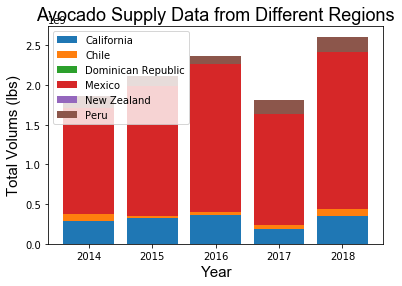

In [11]:
#generate stacked bar chart of regional volumes over time
#need to label each segment
ax = ['2014','2015','2016','2017','2018']
#converting DataFrame to billions - for an easy-to-ready Y axis
regions = ['California','Chile','Dominican Republic','Mexico','New Zealand','Peru']
plt.bar(ax,supply_table.California)
plt.bar(ax,supply_table.Chile, 
        bottom = supply_table.California)
plt.bar(ax,supply_table['Dominican Republic'], 
        bottom = supply_table.Chile +  supply_table.California)
plt.bar(ax,supply_table.Mexico, 
        bottom = supply_table.Chile +  supply_table.California + supply_table['Dominican Republic'])
plt.bar(ax,supply_table["New Zealand"], 
        bottom = supply_table.Chile +  supply_table.California + supply_table['Dominican Republic'] + supply_table.Mexico)
plt.bar(ax,supply_table.Peru, 
        bottom = supply_table.Chile +  supply_table.California + supply_table['Dominican Republic'] + supply_table.Mexico + supply_table["New Zealand"])

plt.title('Avocado Supply Data from Different Regions', fontname = 'Arial', fontsize = 18)
plt.ylabel('Total Volums (lbs)', fontname = 'Arial', fontsize = 15)
plt.xlabel('Year', fontname = 'Arial', fontsize = 15)

plt.legend(regions,loc =2)
plt.savefig('supply_data.png', orientation = 'landscape', dpi = 1800)
plt.show()

In [26]:
california_supply = supply_table.groupby('year')["California"].sum()
chile_supply = supply_table.groupby('year')["Chile"].sum()
domi_supply = supply_table.groupby('year')["Dominican Republic"].sum()
mexico_supply = supply_table.groupby('year')["Mexico"].sum()
newzealand_supply = supply_table.groupby('year')["New Zealand"].sum()
peru_supply = supply_table.groupby('year')["Peru"].sum()
# labels = ["2014","2015","2016","2017","2018"]
# colors = ["lightcoral","gold","lightskyblue","pink","orange"] 
# plt.bar(height = mexico_supply,x=labels)
# plt.title("% of Total Volume by Regions")
# # Save Figure
# # plt.savefig("../Images/02Pyberpiedata.png")
# # Show Figure
# plt.show()
total=supply_table.groupby('year')["California","Chile","Dominican Republic","Mexico","New Zealand","Peru"].sum()
total

,California,Chile,Dominican Republic,Mexico,New Zealand,Peru
year,,,,,,
2014,282499073.0,89276486.0,2690000.0,1.330865e+09,6600000.0,144098295.0
2015,324500001.0,28741076.0,0.0,1.629462e+09,0.0,132985037.0
2016,367502930.0,38946377.0,0.0,1.853859e+09,0.0,99965693.0
2017,188332600.0,42515711.0,0.0,1.408892e+09,0.0,174034878.0
2018,355861600.0,81403615.0,0.0,1.972867e+09,0.0,198724986.0


In [56]:


#create 'month' column
combined_clean_data['month'] = None
for index, row in combined_clean_data.iterrows():
    combined_clean_data.at[index, 'month'] = str(index.month)
combined_clean_data['month'] = pd.to_numeric(combined_clean_data['month'])
combined_clean_data.head()

combined_data = pd.merge(avo_imports_all_df, sales_df, on="Date", how = "outer")

# delete the unuseful column
del combined_data['Unnamed: 0']
# # set the index column with date
combined_data=combined_data.set_index("Date")
combined_clean_data=combined_data.dropna()

,California,Mexico,Chile,Dominican Republic,New Zealand,Peru,Total Volume in Pounds,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,,,,,,,
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,1.07,122743.06,656.71,99220.82,90.32,22775.21,22314.99,460.22,0.00,conventional,2015.0,Albany
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,0.99,551009.05,455565.92,22414.17,738.68,72290.28,50954.84,21329.99,5.45,conventional,2015.0,Atlanta
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,1.26,794310.29,62585.45,462951.05,43720.95,225052.84,221165.85,3626.41,260.58,conventional,2015.0,BaltimoreWashington
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,1.12,80751.29,61245.49,7237.55,6655.69,5612.56,5603.80,8.76,0.00,conventional,2015.0,Boise
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,1.25,562542.86,4034.11,421007.42,93.05,137408.28,137224.94,183.34,0.00,conventional,2015.0,Boston
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,1.38,130908.11,779.02,57999.61,138.81,71990.67,71990.67,0.00,0.00,conventional,2015.0,BuffaloRochester
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,0.98,6374842.90,3614314.44,1860329.30,221330.48,678868.68,651944.51,23422.39,3501.78,conventional,2015.0,California
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,1.15,199980.30,43524.21,45226.73,38578.80,72650.56,69123.57,3526.99,0.00,conventional,2015.0,Charlotte
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,1.24,824216.23,51410.51,544663.98,122929.34,105212.40,99942.37,4693.09,576.94,conventional,2015.0,Chicago


In [33]:
#create 'month' column
combined_clean_data['month'] = None
for index, row in combined_clean_data.iterrows():
    combined_clean_data.at[index, 'month'] = str(index.month)
combined_clean_data['month'] = pd.to_numeric(combined_clean_data['month'])
combined_clean_data.head()

/Users/Guobao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Guobao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,California,Mexico,Chile,Dominican Republic,New Zealand,Peru,Total Volume in Pounds,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
Date,,,,,,,,,,,,,,,,,,,,
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,1.07,122743.06,656.71,99220.82,90.32,22775.21,22314.99,460.22,0.00,conventional,2015.0,Albany,6
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,0.99,551009.05,455565.92,22414.17,738.68,72290.28,50954.84,21329.99,5.45,conventional,2015.0,Atlanta,6
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,1.26,794310.29,62585.45,462951.05,43720.95,225052.84,221165.85,3626.41,260.58,conventional,2015.0,BaltimoreWashington,6
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,1.12,80751.29,61245.49,7237.55,6655.69,5612.56,5603.80,8.76,0.00,conventional,2015.0,Boise,6
2015-06-07,15350416.0,25810260.0,0.0,0.0,0.0,9556378.0,50717054,1.25,562542.86,4034.11,421007.42,93.05,137408.28,137224.94,183.34,0.00,conventional,2015.0,Boston,6


In [61]:
# Obtain the x and y coordinates for the year of 2014
# Retrieve the data with the year 2015
data_2015 = combined_clean_data.loc[combined_clean_data[(combined_clean_data.year == 2015) & (combined_clean_data.type == "conventional")],:]
data_2015
# total_monthly_supply_2015 = data_2015.groupby('month')["Total Volume in Pounds"].sum()
# sales_2015 = data_2015.groupby('month')["AveragePrice"].mean()

# # ## Retrieve the data with the year 2016
# data_2016 = combined_clean_data.loc[combined_clean_data["year"] == 2016,:]
# total_monthly_supply_2016 = data_2016.groupby('month')["Total Volume in Pounds"].sum()
# sales_2016 = data_2016.groupby('month')["AveragePrice"].mean()

# # ## Retrieve the data with the year 2017
# data_2017 = combined_clean_data.loc[combined_clean_data["year"] == 2017,:]
# total_monthly_supply_2017 = data_2017.groupby('month')["Total Volume in Pounds"].sum()
# sales_2017 = data_2017.groupby('month')["AveragePrice"].mean()

# # ## Retrieve the data with the year 2018
# data_2018 = combined_clean_data.loc[combined_clean_data["year"] == 2018,:]
# total_monthly_supply_2018 = data_2018.groupby('month')["Total Volume in Pounds"].sum()
# sales_2018 = data_2018.groupby('month')["AveragePrice"].mean()



# # Build the scatter plots for each year
# scatter2015 = plt.scatter(total_monthly_supply_2015, sales_2015, s=10,
#             marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.8, label = "2015")
# scatter2016 = plt.scatter(total_monthly_supply_2016, sales_2016, s=10,
#             marker="o", facecolors="gold", edgecolors="black", alpha=0.8, label = "2016")
# scatter2017 = plt.scatter(total_monthly_supply_2017, sales_2017, s=10,
#             marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.8, label = "2017")
# scatter2018 = plt.scatter(total_monthly_supply_2018, sales_2018, s=10,
#             marker="o", facecolors="cyan", edgecolors="black", alpha=0.8, label = "2018")


# # Incorporate the other graph properties
# plt.title("Monthly Weather Data & Supply Data in California")
# plt.xlabel("Average Monthly Temperature (Per Year)")
# plt.ylabel("Total Monthly Supply of Avocado in California (pounds)")
# plt.grid(True)
# # Create a legend
# lgnd = plt.legend(loc="best",title = "Years")
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]
# lgnd.legendHandles[3]._sizes = [30]

ValueError: Cannot index with multidimensional key